In [1]:
# Q1
# 정규성 검정

from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

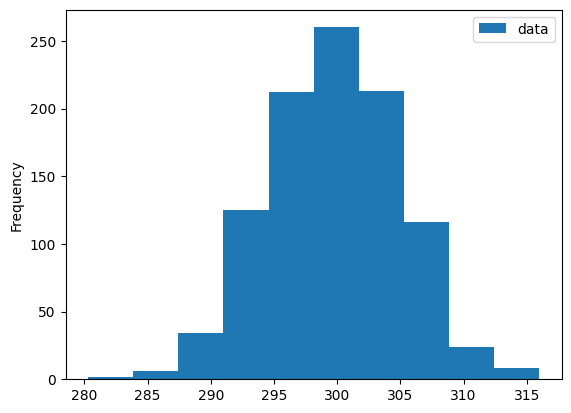

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal1.csv')
df.plot(kind='hist')
plt.show();

In [3]:
len(df)

1000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


### 정규성 검사
#### 가설수립
- 귀무가설 H0 : 정규성을 만족한다.
- 대립가설 H1 : 정규성을 만족하지 않는다.

In [5]:
result = stats.shapiro(df)

if result.pvalue >= 0.05:
    print(f'P-Value가 {result.pvalue:.3f} 이므로 유의수준 5% 하에서 귀무가설을 채택, 정규성을 만족한다.')
else:
    print(f'P-Value가 {result.pvalue:.3f} 이므로 유의수준 5% 하에서 귀무가설을 기각하고 대립가설을 채택, 정규성을 만족하지 않는다.')

P-Value가 0.348 이므로 유의수준 5% 하에서 귀무가설을 채택, 정규성을 만족한다.


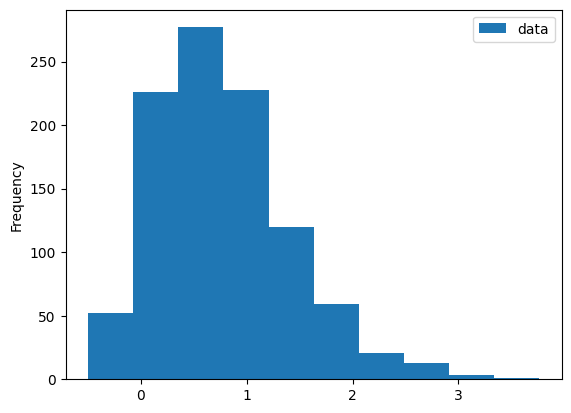

In [6]:
# Q2
# 정규성 검사

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')

df.plot(kind='hist')
plt.show();

In [7]:
len(df)

1000

In [8]:
result = stats.shapiro(df)

if result.pvalue >= 0.05:
    print(f'P-Value가 {result.pvalue:.3f} 이므로 유의수준 5% 하에서 귀무가설을 채택, 정규성을 만족한다.')
else:
    print(f'P-Value가 {result.pvalue:.3f} 이므로 유의수준 5% 하에서 귀무가설을 기각하고 대립가설을 채택, 정규성을 만족하지 않는다.')

P-Value가 0.000 이므로 유의수준 5% 하에서 귀무가설을 기각하고 대립가설을 채택, 정규성을 만족하지 않는다.


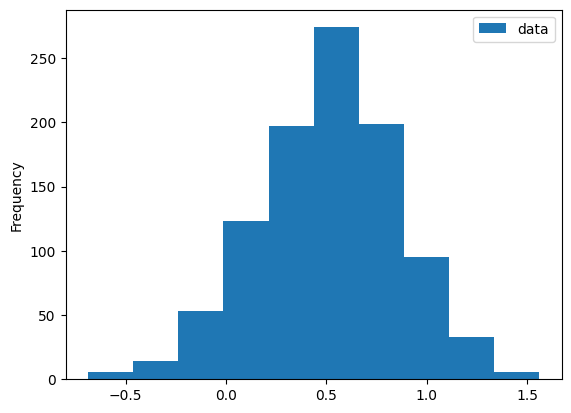

In [9]:
# Q3
# 로그 데이터 정규성 검사

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
log_df = np.log1p(df)
log_df.plot(kind='hist')
plt.show()

In [10]:
len(log_df)

1000

In [11]:
result = stats.shapiro(log_df)

if result.pvalue >= 0.05:
    print(f'P-Value가 {result.pvalue:.3f} 이므로 유의수준 5% 하에서 귀무가설을 채택, 정규성을 만족한다.')
else:
    print(f'P-Value가 {result.pvalue:.3f} 이므로 유의수준 5% 하에서 귀무가설을 기각하고 대립가설을 채택, 정규성을 만족하지 않는다.')

P-Value가 0.175 이므로 유의수준 5% 하에서 귀무가설을 채택, 정규성을 만족한다.


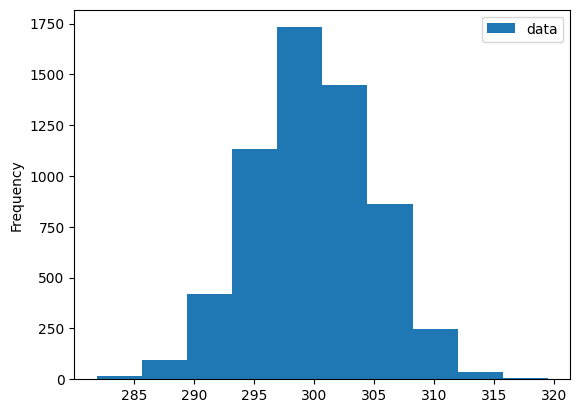

In [12]:
# Q4
# 정규성 검사

# 귀무가설 H0 : 정규성을 만족한다.
# 대립가설 H1 : 정규성을 만족하지 않는다.

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')

df.plot(kind='hist')
plt.show();

In [13]:
len(df)

6000

표본이 6000개 이므로 Shapiro 테스트는 부정확할 수 있기 때문에  
Lilliefors 검정을 진행한다.

In [14]:
# Lilliefors test (Kolmogorov-Smirnov 변형)
from statsmodels.stats.diagnostic import lilliefors

stats, p = lilliefors(log_df)

if p >= 0.05:
    print(f'P-Value가 {p:.3f} 이므로 유의수준 5% 하에서 귀무가설을 채택, 정규성을 만족한다.')
else:
    print(f'P-Value가 {p:.3f} 이므로 유의수준 5% 하에서 귀무가설을 기각하고 대립가설을 채택, 정규성을 만족하지 않는다.')

# !!!!! !!!!! CHECK !!!!! !!!!! 

P-Value가 0.120 이므로 유의수준 5% 하에서 귀무가설을 채택, 정규성을 만족한다.


In [15]:
# Q5
# 100명의 키 정보가 들어 있는 데이터가 있다.
# 데이터가 정규성을 만족하는지 확인하라.
# 그리고 평균키는 165라 판단할수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  100 non-null    float64
dtypes: float64(1)
memory usage: 928.0 bytes


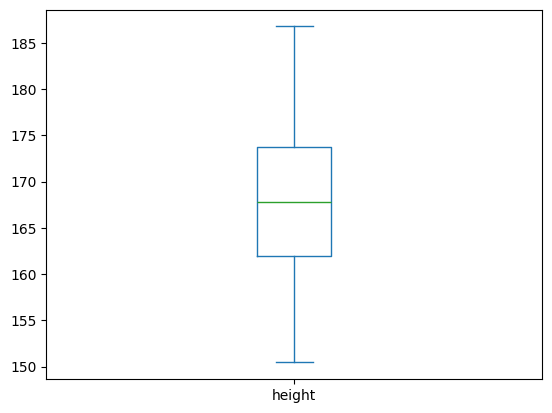

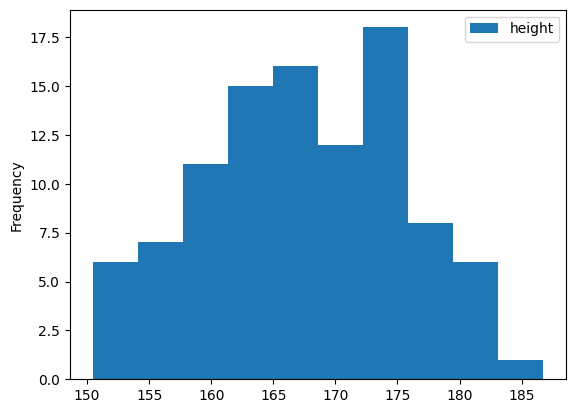

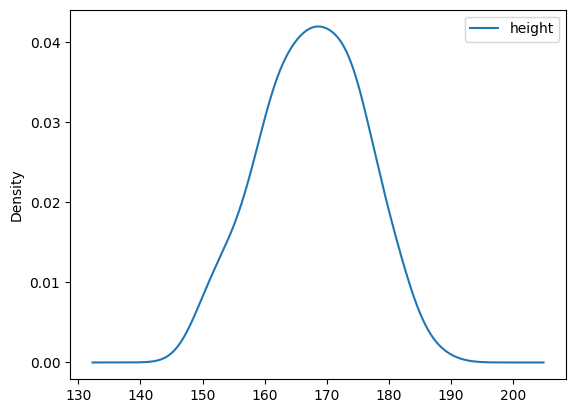

In [16]:
df.plot(kind='box');
df.plot(kind='hist');
df.plot(kind='kde');

In [17]:
df.describe()

,height
count,100.000000
mean,167.622847
std,8.191817
min,150.441147
25%,161.922924
50%,167.737013
75%,173.739115
max,186.762474


### 정규성 검정
- 귀무가설 H0 : 정규성을 만족한다.
- 대립가설 H1 : 정규성을 불만족한다.

표본은 100개이므로 shapiro test를 진행한다.

In [18]:
from scipy import stats

result = stats.shapiro(df.height)

if result.pvalue >= 0.05:
    print(f'P-Value가 {result.pvalue:.3f}이므로 유의수준 5% 하에서 귀무가설을 채택, 정규성을 만족한다.')
else:
    print(f'P-Value가 {result.pvalue:.3f}이므로 유의수준 5% 하에서 귀무가설을 기각하고 대립가설을 채택, 정규성을 불만족한다.')

P-Value가 0.456이므로 유의수준 5% 하에서 귀무가설을 채택, 정규성을 만족한다.


정규성을 만족하므로 단일 표본 T-검정을 진행한다.  
단일 표본 T-검정의 가설은 아래와 같다.

- 귀무가설 H0 : 평균키는 165다.
- 대립가설 H1 : 평균키는 165가 아니다.

In [19]:
mu =165
result = stats.ttest_1samp(df, popmean=mu)

if result.pvalue[0] >= 0.05:
    print(f'P-Value가 {result.pvalue[0]:.3f}이므로 유의수준 5% 하에서 귀무가설을 채택, 평균키는 165cm이다.')
else:
    print(f'P-Value가 {result.pvalue[0]:.3f}이므로 유의수준 5% 하에서 귀무가설을 기각하고 대립가설을 채택, 평균키는 165cm가 아니다.')

P-Value가 0.002이므로 유의수준 5% 하에서 귀무가설을 기각하고 대립가설을 채택, 평균키는 165cm가 아니다.


In [20]:
# Q6
# 등분산 검정
# 두 학급의 시험성적에 대한 데이터를 그룹 간 등분산 검정을 시행하라

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy2.csv')
df.head()

,class,score
0,A,84
1,A,59
2,A,49
3,A,57
4,A,82


In [21]:
class_a = df[df['class'] == 'A'].score
class_b = df[df['class'] == 'B'].score

In [22]:
df.groupby('class').describe()

score                                                     
       count       mean        std   min   25%   50%    75%   max
class                                                            
A      300.0  62.076667  18.749826  30.0  46.0  60.5  78.00  94.0
B      180.0  63.694444  19.399101  30.0  45.0  66.5  79.25  94.0

In [23]:
# a_pval = stats.shapiro(class_a).pvalue

# if a_pval >= 0.05:
#     print(f'P-Value가 {a_pval:.3f}이므로 유의수준 5% 하에서 귀무가설을 채택, 정규성을 만족한다.')
# else:
#     print(f'P-Value가 {a_pval:.3f}이므로 유의수준 5% 하에서 귀무가설을 기각하고 대립가설을 채택, 정규성을 불만족한다.')

In [24]:
# b_pval = stats.shapiro(class_b).pvalue

# if b_pval >= 0.05:
#     print(f'P-Value가 {b_pval:.3f}이므로 유의수준 5% 하에서 귀무가설을 채택, 정규성을 만족한다.')
# else:
#     print(f'P-Value가 {b_pval:.3f}이므로 유의수준 5% 하에서 귀무가설을 기각하고 대립가설을 채택, 정규성을 불만족한다.')

### 등분산 검정
- 귀무가설 H0 : 등분산이다.
- 대립가설 H1 : 이분산이다.

In [25]:
stats.levene(class_a, class_b)

LeveneResult(statistic=np.float64(0.3145466542912649), pvalue=np.float64(0.5751662820554713))

In [26]:
result = stats.levene(class_a, class_b, center='median')

if result.pvalue >= 0.05:
    print(f'P-Value가 {result.pvalue:.3f}이므로 유의수준 5% 하에서 귀무가설을 채택, 등분산성을 만족한다.')
else:
    print(f'P-Value가 {result.pvalue:.3f}이므로 유의수준 5% 하에서 귀무가설을 기각하고 대립가설을 채택, 등분산성을 불만족한다.')

P-Value가 0.575이므로 유의수준 5% 하에서 귀무가설을 채택, 등분산성을 만족한다.


In [27]:
result = stats.levene(class_a, class_b, center='mean')

if result.pvalue >= 0.05:
    print(f'P-Value가 {result.pvalue:.3f}이므로 유의수준 5% 하에서 귀무가설을 채택, 등분산성을 만족한다.')
else:
    print(f'P-Value가 {result.pvalue:.3f}이므로 유의수준 5% 하에서 귀무가설을 기각하고 대립가설을 채택, 등분산성을 불만족한다.')

P-Value가 0.476이므로 유의수준 5% 하에서 귀무가설을 채택, 등분산성을 만족한다.


In [28]:
# Q7
# 등분산 검정
# 두 학급의 시험성적에 대한 데이터 그룹 간 등분산 검정을 시행하라

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy3.csv')
df.head()

,class,score
0,A,32
1,A,69
2,A,68
3,A,60
4,A,78
